In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


## Install necessary Libraries

In [0]:
import os
os.chdir("/content/drive/My Drive/CA684_Assignment/")

## Import Libraries

In [0]:
## Import necessary libraries
import pandas as pd
import scipy
from keras import Sequential
from keras import layers
from keras import regularizers
import numpy as np
from string import punctuation
from collections import Counter
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Using TensorFlow backend.


## Importing Necessary Data


In [0]:
# reading labels and captions into dataframe
def read_caps(fname):
    """Load the captions into a dataframe"""
    vn = []
    cap = []
    df = pd.DataFrame();
    with open(fname) as f:
        for line in f:
            pairs = line.split()
            vn.append(pairs[0])
            cap.append(pairs[1])
        df['video']=vn
        df['caption']=cap
    return df


# loading captions into df_cap 
cap_path = './Dev-set/Captions/dev-set_video-captions.txt'
df_cap=read_caps(cap_path)

# loading ground truth values into labels
label_path = './Dev-set/Ground-truth/'
labels=pd.read_csv(label_path+'ground-truth.csv')

In [0]:
#df_cap
#labels

## Data Preprocessing 

In [0]:
## Lets count the words and remove punctuations
counts = Counter()
for i, cap in enumerate(df_cap['caption']):
    # replace punctuations with space
    # convert words to lower case 
    text = ''.join([c if c not in punctuation else ' ' for c in cap]).lower()
    df_cap.loc[i,'caption'] = text
    counts.update(text.split())

In [0]:
#counts
#len(counts)

## Text Mapping 

In [0]:
len_token = len(counts) # create length of token
tokenizer = Tokenizer(num_words=len_token) # use tokenizer
#print(len_token)

In [0]:
tokenizer.fit_on_texts(list(df_cap.caption.values)) #fit a list of captions to the tokenizer
#the tokenizer vectorizes a text corpus, by turning each text into either a sequence of integers 

## One-Hot Encoding of text

In [0]:
## Convert the integers into binary 0 and 1 format
one_hot_res = tokenizer.texts_to_matrix(list(df_cap.caption.values),mode='binary')


In [0]:
#one_hot_res.shape

## Get X and Y values for prediction

In [0]:
## one_hot_res will be our X variable
## predictor will be our Y variable
predictor = labels[['short-term_memorability','long-term_memorability']].values
Y = predictor
X = one_hot_res


## Train-Test Split

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)



---
## Model is built using keras as it provides GPU support for faster training.

### Multilayer perceptron Model

Train on 4800 samples, validate on 1200 samples
Epoch 1/20
4800/4800 [==============================] - 1s 164us/step - loss: 0.0620 - acc: 0.4727 - val_loss: 0.0243 - val_acc: 0.5142
Epoch 2/20
4800/4800 [==============================] - 1s 135us/step - loss: 0.0330 - acc: 0.5537 - val_loss: 0.0197 - val_acc: 0.7100
Epoch 3/20
4800/4800 [==============================] - 1s 134us/step - loss: 0.0267 - acc: 0.6129 - val_loss: 0.0175 - val_acc: 0.7100
Epoch 4/20
4800/4800 [==============================] - 1s 133us/step - loss: 0.0233 - acc: 0.6438 - val_loss: 0.0162 - val_acc: 0.7100
Epoch 5/20
4800/4800 [==============================] - 1s 134us/step - loss: 0.0215 - acc: 0.6560 - val_loss: 0.0154 - val_acc: 0.7100
Epoch 6/20
4800/4800 [==============================] - 1s 130us/step - loss: 0.0202 - acc: 0.6723 - val_loss: 0.0149 - val_acc: 0.7100
Epoch 7/20
4800/4800 [==============================] - 1s 139us/step - loss: 0.0193 - acc: 0.6819 - val_loss: 0.0145 - val_acc: 0.7100


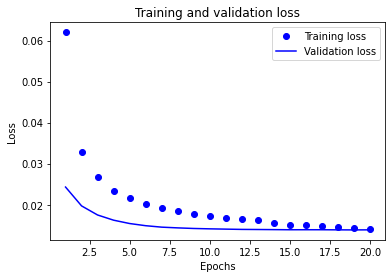

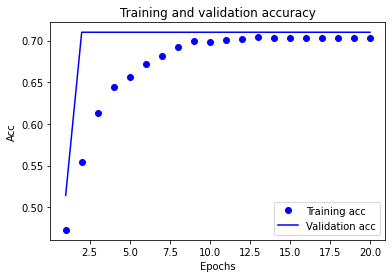

In [0]:
## Multi Layer perceptron Model 

model=Sequential() # Create Sequential NN model

## Add layers for MLP
model.add(layers.Dropout(0.6, input_shape=(len_token,))) # add dropout layer

# layer of 10 neurons with selu activation function, L2 Regularization and initial weights as zeros
model.add(layers.Dense(10,activation='selu',kernel_regularizer=regularizers.l2(0.001), kernel_initializer='zeros')) 

# layer of 10 neurons with selu activation function and L2 Regularization
model.add(layers.Dense(10,activation='selu',kernel_regularizer=regularizers.l2(0.001)))

# add dropout
model.add(layers.Dropout(0.6))
model.add(layers.Dense(2,activation='sigmoid')) ## Last activation as sigmoid to predict score

## Compile the model 
# Optimizer Adamax
model.compile(optimizer='adamax',loss='mse',metrics=['acc'])

## All hyperparameters are selected using GridSearch and Trial & Error Approach

## Training the model 
# Number of epochs also comes from Gridsearch
history = model.fit(X_train,Y_train,epochs=20, validation_data=(X_test,Y_test))

# visualizing the model
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()



## To predict and test the model. See the code at the end

## Convolutional Neural Network Model


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Embedding` call to the Keras 2 API: `Embedding(5191, 100, input_length=5191, embeddings_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 4800 samples, validate on 1200 samples
Epoch 1/20
4800/4800 [==============================] - 5s 1ms/step - loss: 0.0352 - acc: 0.6990 - val_loss: 0.0271 - val_acc: 0.7100
Epoch 2/20
4800/4800 [==============================] - 5s 1ms/step - loss: 0.0236 - acc: 0.7035 - val_loss: 0.0216 - val_acc: 0.7100
Epoch 3/20
4800/4800 [==============================] - 5s 1ms/step - loss: 0.0200 - acc: 0.7035 - val_loss: 0.0193 - val_acc: 0.7100
Epoch 4/20
4800/4800 [==============================] - 5s 1ms/step - loss: 0.0183 - acc: 0.7035 - val_loss: 0.0180 - val_acc: 0.7100
Epoch 5/20
4800/4800 [==============================] - 5s 1ms/step - loss: 0.0173 - acc: 0.7035 - val_loss: 0.0174 - val_acc: 0.7100
Epoch 6/20
4800/4800 [==============================] - 5s 1ms/step - loss: 0.0166 - acc: 0.7035 - val_loss: 0.0166 - val_acc: 0.7100
Epoch 7/20
4800/4800 [==============================] - 5s 1ms/step - loss: 0.0161 - acc: 0.7035 - val_loss: 0.0162 - val_acc: 0.7100
Epoch 8/20
480

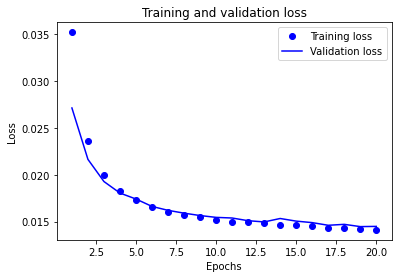

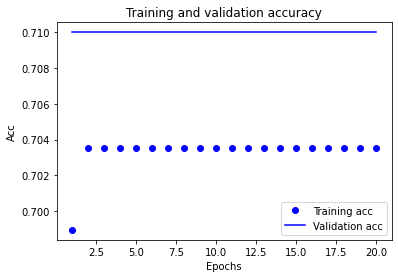

In [0]:
# Some prerequiste for RNN
## one_hot_res will be our X variable
## predictor will be our Y variable
predictor = labels[['short-term_memorability','long-term_memorability']].values
Y = predictor
X = one_hot_res
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

## Convolutional Neural Network 
embedding_dim = 100 # Embedding dimension to convert / reduce captions dimensions
vocab_size=5191 # Size of our vocabulary

model=Sequential() # Create Sequential NN model

## add Embedding layer to convert dimensions required by Convolutional Layer
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=5191, init='uniform'))

## add 1D Convolutional Layer of with 128 filters and 5 as length of Convolutional window
model.add(layers.Conv1D(128, 5, activation='selu', kernel_initializer='zeros', kernel_regularizer=regularizers.l2(0.001)))

## add global max pooling layers as it a Naturnal Language Processing task
model.add(layers.GlobalMaxPooling1D())

## layer of 10 neurons with Ridge Regularization and dropout
model.add(layers.Dense(10, activation='selu', kernel_regularizer=regularizers.l2(0.001)))
#model.add(layers.Dropout(0.6))

## layer of 10 neurons with Ridge Regularization
model.add(layers.Dense(10,activation='selu',kernel_regularizer=regularizers.l2(0.001)))
#model.add(layers.Dropout(0.6))

## output layer with 2 neurons for each score with sigmoid activation
model.add(layers.Dense(2, activation='sigmoid'))

# compile the model 
model.compile(optimizer='adamax',loss='mse',metrics=['acc'])

# training the model 
history = model.fit(X_train,Y_train,epochs=20, validation_data=(X_test,Y_test))

# visualizing the model
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure()
acc = history.history['acc']
#acc = history.history['soft_acc']
#val_acc = history.history['val_soft_acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

## To predict and test the model. See the code at the end

## Recurrent Neural Network Model

In [0]:
# For RNN we will need to use sequence embedding instead of one hot encoding
## Sequence Encoding of the text
sequences = tokenizer.texts_to_sequences(list(df_cap.caption.values))

In [0]:
print(sequences[0])

[724, 7, 35, 884, 384, 91]


### Making sequence encoding of same length to ensure we have same number of dimensions across all elements

In [0]:
## set max length of all dimensions to 50
max_length=50
X_seq = np.zeros((len(sequences),max_length))
for i in range(len(sequences)):
    n = len(sequences[i])
    if n==0:
        print(i)
    else:
        X_seq[i,-n:] = sequences[i]
X_seq.shape

(6000, 50)

## Build and train RNN Model 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Embedding` call to the Keras 2 API: `Embedding(input_dim=5191, output_dim=20, input_length=50, embeddings_initializer="uniform")`
  
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 4800 samples, validate on 1200 samples
Epoch 1/10
4800/4800 [==============================] - 21s 4ms/step - loss: 0.0531 - acc: 0.6292 - val_loss: 0.0326 - val_acc: 0.7100
Epoch 2/10
4800/4800 [==============================] - 20s 4ms/step - loss: 0.0317 - acc: 0.6594 - val_loss: 0.0240 - val_acc: 0.7100
Epoch 3/10
4800/4800 [==============================] - 20s 4ms/step - loss: 0.0243 - acc: 0.6850 - val_loss: 0.0189 - val_acc: 0.7100
Epoch 4/10
4800/4800 [==============================] - 20s 4ms/step - loss: 0.0209 - acc: 0.6858 - val_loss: 0.0169 - val_acc: 0.7100
Epoch 5/10
4800/4800 [==============================] - 20s 4ms/step - loss: 0.0185 - acc: 0.6975 - val_loss: 0.0160 - val_acc: 0.7100
Epoch 6/10
4800/4800 [==============================] - 20s 4ms/step - loss: 0.0174 - acc: 0.6981 - val_loss: 0.0150 - val_acc: 0.7100
Epoch 7/10
4800/4800 [==============================] - 20s 4ms/step - loss: 0.0163 - acc: 0.7027 - val_loss: 0.0145 - val_acc: 0.7100
Epoch 8

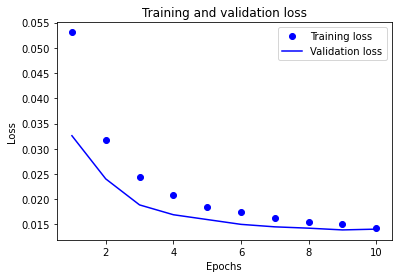

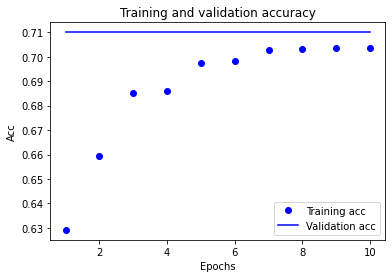

In [0]:
# Some prequisites for RNN
## sequences will be our X variable
## predictor will be our Y variable
predictor = labels[['short-term_memorability','long-term_memorability']].values
Y = predictor
X = X_seq
## Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)


## Recurrent Neural Network Model 
## All hyperparameters are selected using GridSearch and Trial & Error Approach

model=Sequential() # Create Sequential NN model

## add Embedding layer for RNN to map our data into a format suitable for LSTM layer
model.add(layers.Embedding(input_dim=5191, output_dim=20, input_length=50, init='uniform'))

## add LSTM layer for some hidden layer and memory into the network
model.add(layers.LSTM(150, activation='selu', recurrent_initializer='uniform', kernel_initializer='zeros', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.2))

## layer of 30 neurons to map down from 150 hidden neurons with ridge regularizer
model.add(layers.Dense(30, activation='selu', kernel_regularizer=regularizers.l2(0.001)))

## Dropout layer
model.add(layers.Dropout(0.6))

## Output layer of 2 neurons for each score with sigmoid activation 
model.add(layers.Dense(2, activation='sigmoid'))

## Compile the model 
# Optimizer Adamax
model.compile(optimizer='adamax',loss='mse',metrics=['acc'])


## Training the model 
# Number of epochs also comes from Gridsearch
history = model.fit(X_train,Y_train,epochs=10, validation_data=(X_test,Y_test))

# visualizing the model
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()



## Predict the values

In [0]:
predictions = model.predict(X_test)
predictions.shape

(1200, 2)

In [0]:
#predictions

## Get Spearman Rank Score

### MLP results

In [0]:
rho = scipy.stats.spearmanr(predictions, Y_test)[0]
print(rho)
print("Short-term:", rho[2][1])
print("Long-term:", rho[3][1])

[[1.         0.99999019 0.41575533 0.19275388]
 [0.99999019 1.         0.41562068 0.1927497 ]
 [0.41575533 0.41562068 1.         0.34074423]
 [0.19275388 0.1927497  0.34074423 1.        ]]
Short-term: 0.4156206821952207
Long-term: 0.19274970164242605


### RNN results

In [0]:
rho = scipy.stats.spearmanr(predictions, Y_test)[0]
print(rho)
print("Short-term:", rho[2][1])
print("Long-term:", rho[3][1])

[[1.         0.99993269 0.42419069 0.20851846]
 [0.99993269 1.         0.42479308 0.20864073]
 [0.42419069 0.42479308 1.         0.34074423]
 [0.20851846 0.20864073 0.34074423 1.        ]]
Short-term: 0.4247930846651648
Long-term: 0.2086407286978284


### CNN results

In [0]:
rho = scipy.stats.spearmanr(predictions, Y_test)[0]
print(rho)
print("Short-term:", rho[2][1])
print("Long-term:", rho[3][1])

[[1.         0.99964759 0.17288767 0.09233913]
 [0.99964759 1.         0.1726415  0.0922919 ]
 [0.17288767 0.1726415  1.         0.34074423]
 [0.09233913 0.0922919  0.34074423 1.        ]]
Short-term: 0.17264150242499796
Long-term: 0.09229190095784394


## Save Model and Create Predictor Score CSV

In [0]:
#model.save('./my_model_aks.h5')
final_results = pd.DataFrame({'video':labels['video'][4800:],'Short-term-pred':predictions[:,0],'Long-term-pred':predictions[:,1], 'Short-term-true':labels['short-term_memorability'][4800:], 'Long-term-true':labels['long-term_memorability'][4800:]})
final_results = final_results.reset_index(drop=True)

In [0]:
final_results
final_results.to_csv('/content/drive/My Drive/memorability_scores_RNN.csv')

## --- END OF MODELS ---

## Some additional pre training performed to get hyperparameters

In [0]:
## Below code is a quick snippet used to perform gridsearch and get hyperparameters

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import cross_val_score
import numpy
from keras import regularizers
from keras_tqdm import TQDMNotebookCallback


# Function to create model, required for KerasClassifier
def create_model(num_neuron='10',activation='selu', optimizer='adamax', dropout='0.5', kernel_lambda='0.001', kernel_init='glorot_uniform'):
    # create model
    len_token = len(counts)
    model = Sequential()
    model.add(layers.Dense(num_neuron,activation=activation,kernel_regularizer=regularizers.l2(kernel_lambda),
                           input_shape=(len_token,))) # there are 5191 inputs ! => 10 nodes
    model.add(layers.Dropout(dropout))
    model.add(layers.Dense(num_neuron,activation=activation,kernel_regularizer=regularizers.l2(kernel_lambda)))
    model.add(layers.Dropout(dropout))
    model.add(layers.Dense(2,activation='sigmoid')) # there are 2 probability outputs! try 'selu'
    model.compile(optimizer=optimizer, loss='mse',metrics=['accuracy']) #try adamax
    return model

# create model
model = KerasRegressor(build_fn=create_model, verbose=0)

# evaluate using 10-fold cross validation
# kfold = KFold(n_splits=5, shuffle=True, random_state=1)




In [0]:
# Hyperparameters tuning 

# grid search for No.of epochs, batch size, optimizer, Learning Rate, Momentum, 
# Network Weight Initialization, Dropout Regularization, Number of Neurons in the Hidden Layer 
from sklearn.model_selection import GridSearchCV
epochs = [10] #[10, 20, 30, 50]
batches = [5] #[5, 10, 20, 40, 60, 80, 100]

#learn_rates = [0.001, 0.01, 0.1, 0.2, 0.3]
#momentums = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
dropouts = [0.5] #[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
#weight_constraint = [1, 2, 3, 4, 5]
num_neurons = [10] #[1, 10, 20, 30, 40, 50]

optimizers =  #['RMSprop','Adagrad','SGD','Adadelta','Adam','Adamax','Nadam']
#activationss = ['softmax','softplus','softsign','relu','tanh','sigmoid','selu','hard_sigmoid','linear']
activations = ['relu','selu','linear']

kernel_inits = ['glorot_uniform','glorot_normal','normal','uniform',
                      'lecun_uniform','zero','he_normal','he_uniform']

kernel_lambdas = [0.0001]  #[0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]


param_grid = dict(optimizer=optimizers, epochs=epochs, batch_size=batches, kernel_init=kernel_inits, kernel_lambda=kernel_lambdas, 
                  num_neuron=num_neurons, dropout=dropouts, )
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=15, n_jobs=-1)
grid_result = grid.fit(X_train, Y_train)

